Sophia Valentina Widmer
i6262004

# Data Analysis

# Clinic1: Exploratory Data Analysis

## DELIVERABLES (DEADLINE 17/February late night, wildcards possible)

Instructions for the deliverable: 

* Make sure that you include a proper amount/mix of comments, results and code.

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. Enjoy!

* Honor code applies to these tasks. Only individual work should be submitted.

* Data science is a collaborative activity. While you may talk with others about the clinic, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

### Learning goals

By completing and delivering the clinic tasks you will know how to :

* Load files and check their integrity
* Identifying the type of data collected, missing values, anomalies, etc.
* Wrangle data for analysis
* Parse columns in the dataframe to create new dataframe columns
* Use EDA to learn more about your data
* Create and interpret informative visualizations to explore the data set

## 0: Introduction to the Problem

We would like to help a business man in the city of Rome (let's call this guy Pim). Pim wants to introduce a scooter rental system for people to drive around the city. He got some data from a pilot that was conducted in the city and now he would like to know more about the users and be able to draw insights from this data. 

In this clinic, you will perform tasks to clean, visualize, and explore the user data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

### 0.1 A note on the basic EDA workflow

Before we move to the actual clinic tasks, a reminder about the basic EDA workflow:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

### 0.2 Grading

The clinic is broken down to several sub-questions so that they help you solve the tasks in an iterative way but also to facilitate grading. 

For responses that require numerical answers and some comment/discussion (free response), readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, you should abide to the basic principles as we have discussed in class. Note that for ALL plotting questions from here on out (also for other clinics), we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?


### Score breakdown per sub-question

Question | Points
--- | ---
Question 1a | 2
Question 1b | 1
Question 1c | 2
Question 1d | 4
Question 2a | 2
Question 2b | 2
Question 2c | 1
Question 2d | 1
Question 2e | 2
Question 2f | 2
Question 3a | 5
Question 3b | 3
Question 4  | 3
Question 5a | 2
Question 5b | 2
Question 6a | 1
Question 6b | 4
Question 6c | 3
Question 6d | 2
Question 7a | 4
Question 7b | 4
Total | 52

Your final score out of 52 will be scaled down to 1 and be your final grade for this clinic.

In [2]:
# First things first
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

### 0.3 Loading the data

The data we are exploring is collected at a period between 2011-2012 in Rome.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total users including casual and registered  

The following code loads the data into a Pandas `DataFrame'.

In [3]:
# Run this cell to load the data.  No further action is needed
full = pd.read_csv('clientnumbers.txt')
full.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Below, we show the shape of the file. You should see that the size of the DataFrame matches the number of lines in the file, minus the header row.

In [4]:
full.shape


(17379, 17)

---
## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `clientnumbers.txt` unmodified.

### Question 1
#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)

Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`.

**Note:** If you want to revert changes, run the cell that reloads the file.

**Hint:**  One approach is to use the [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the pandas DataFrame class. We haven't discussed how to do this so you'll need to look at the documentation. The most concise way is with the approach described in the documentation as "nested-dictonaries", though there are many possible solutions.

In [5]:
new = full
new['holiday'] = new['holiday'].replace([0,1], ['no', 'yes'])
new['weekday'] = new['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sun','Mon', 'Tue', 'Wed','Thu','Fri','Sat'])
new['workingday'] = new['workingday'].replace([0,1], ['no', 'yes'])
new['weathersit'] = new['weathersit'].replace([1,2,3,4], ['Clear', 'Mist', 'Light', 'Heavy'])
new.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,no,Sat,no,Mist,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,no,Sat,no,Clear,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,no,Sat,no,Clear,0.32,0.3485,0.76,0.0000,8,6,14


#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.

In [6]:
#Code for 1b goes here
num_holidays = new.holiday.value_counts().yes
print(num_holidays)

500


#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual users for each day
* `registered`: total number of registered users for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

**Hint**: `groupby` and `agg`. For the `agg` method, please check the [documentation](https://pandas.pydata.org/docs/reference/groupby.html) for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. For the `workingday` column we can take any of the values since we are grouping by the day, thus the value will be the same within each group. Take a look at the `'first'` or `'last'` aggregation functions.

In [7]:
###code for 1c goes here
daily_counts = new[['casual', 'registered', 'workingday', 'dteday']]
daily_counts = daily_counts.set_index('dteday')
daily_counts = daily_counts.groupby('dteday').agg({'casual': 'sum', 'registered':'sum', 'workingday':'first'})
daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


#### Question 1d (Identifying issues with the data)

Inspect the variables (based on the codebook) and identify potential issues with one (or more) of them. Think about missing values, mistakes, outliers, errors etc. Correct these and justify your answers accordingly.

In [435]:
###code for 1d goes here
new.info()
new[['weekday', 'holiday', 'workingday', 'weathersit']].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  object 
 7   weekday     17379 non-null  object 
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  object 
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8), object(5)
memory usage: 2.3+ MB


,weekday,holiday,workingday,weathersit
count,17379,17379,17379,17379
unique,7,2,2,5
top,Sat,no,yes,Clear
freq,2512,16879,11865,11393


In [436]:
#finding the weird values in the weathersit column
mask=full['weathersit']==0
helps = new.loc[mask]
helps.shape

(27, 17)

In [437]:
#removing these wrong data points
mask2 = full['weathersit'] != 0
new = new.loc[mask2]

In [438]:
new.corr()

,instant,season,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404557,0.866609,0.490130,-0.004863,0.136073,0.137503,0.009655,-0.074516,0.158333,0.282455,0.278512
season,0.404557,1.000000,-0.012628,0.835897,-0.006065,0.311655,0.319191,0.150805,-0.149569,0.120118,0.173841,0.177438
yr,0.866609,-0.012628,1.000000,-0.008177,-0.004076,0.040138,0.038558,-0.083654,-0.008397,0.142671,0.253452,0.250149
mnth,0.490130,0.835897,-0.008177,1.000000,-0.005586,0.203166,0.209389,0.164926,-0.136210,0.069002,0.123920,0.121954
hr,-0.004863,-0.006065,-0.004076,-0.005586,1.000000,0.137566,0.133667,-0.276496,0.137558,0.301300,0.373729,0.394287
temp,0.136073,0.311655,0.040138,0.203166,0.137566,1.000000,0.987674,-0.069621,-0.023043,0.459616,0.334603,0.404510
atemp,0.137503,0.319191,0.038558,0.209389,0.133667,0.987674,1.000000,-0.051655,-0.062332,0.454084,0.331906,0.400717
hum,0.009655,0.150805,-0.083654,0.164926,-0.276496,-0.069621,-0.051655,1.000000,-0.289997,-0.346889,-0.273619,-0.322822
windspeed,-0.074516,-0.149569,-0.008397,-0.136210,0.137558,-0.023043,-0.062332,-0.289997,1.000000,0.089796,0.081709,0.093074
casual,0.158333,0.120118,0.142671,0.069002,0.301300,0.459616,0.454084,-0.346889,0.089796,1.000000,0.505819,0.694390


*** fancy answer goes here ***
As visible above, there are no missing vlaues to deal with as there is the same number of non-null numbers per column including the index - therefore there are no missing values. While inspecting the variables with non-numerical entries. There are weird results. The standard deviation for the variables casual, registered and cnt are bigger than or nearly as big as the mean which means that the data is probably bimodal - there is two modes and very little data in the middle. This also shows that there are presumably large outliers. Doing a correlation analysis shows that apart form obvious correlations(such as between the total number of users and the registered number of users) there is none that stand out. 
There is also a mistake with the column weathersit: there are only supposed to be 4 different weathersituations, it is however visible from the description of the column that there are 5 unique aspects. These points were found - there are 27 values that are 0 and therefore do not fit into any category. Since it is a very small amount of data, it has been decided to simply ignore this data and remove it from the data frame. Another noticeable thing is that the labels of the season are wrong - a 1 corresponds to winter and not to spring. Nothing needs to be changed about the dataframe, simply the labeling has to be altered.

---
## 2: Exploring the Distribution of Users

Let's begin by comparing the distribution of the daily counts of casual and registered users. The following questions require some heavy plotting. Below we are summarizing some functions (should be updated on the latest versions). 

### Matplotlib and Seaborn Table of Common Functions

`x` and `y` are sequences of values (i.e. arrays, lists, or Series).

| Function | Description |
| -------- | ----------- |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y` |
| `plt.title(name)` | Adds a title `name` to the current plot |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y` |
| `plt.hist(x, bins=None)` | Creates a histogram of `x`; `bins` can be an integer or a sequence |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height` |
| `sns.histplot(data, x, y, hue, kde)` | Creates a distribution plot; `data` is a DataFrame; `x`, `y` are column names in `data` that specify positions on the x and y axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kde` is a boolean that determines whether to overlay a KDE curve |
|`sns.lineplot(data, x, y, hue)` | Creates a line plot |
|`sns.scatterplot(data, x, y, hue, size)` | Creates a scatter plot; `size` is a vector that contains the size of point for each subcategory based on `hue` |
|`sns.kdeplot(x, y)` |  Creates a kernel density estimate plot; `x`, `y` are series of data that indicate positions on the `x` and `y` axis |
|`sns.jointplot(x, y, data, kind)` | Creates a joint plot of 2 variables with KDE plot in the middle and a distribution plot for each variable on the sides; `kind` determines the visualization type for the distribution plot, can be `scatter`, `kde` or `hist` |

**Note**: This list of functions and parameters is **not** exhaustive. You may need to reference and explore more documentation to answer the following questions, but we will help you through that process. 

### Question 2
#### Question 2a

Use the [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) function to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

**Hint:** You will need to set the `stat` parameter appropriately to match the desired plot.

Include a legend, xlabel, ylabel, and title. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

**Update 13/2: distplot is deprecated, work with displot or histplot instead**

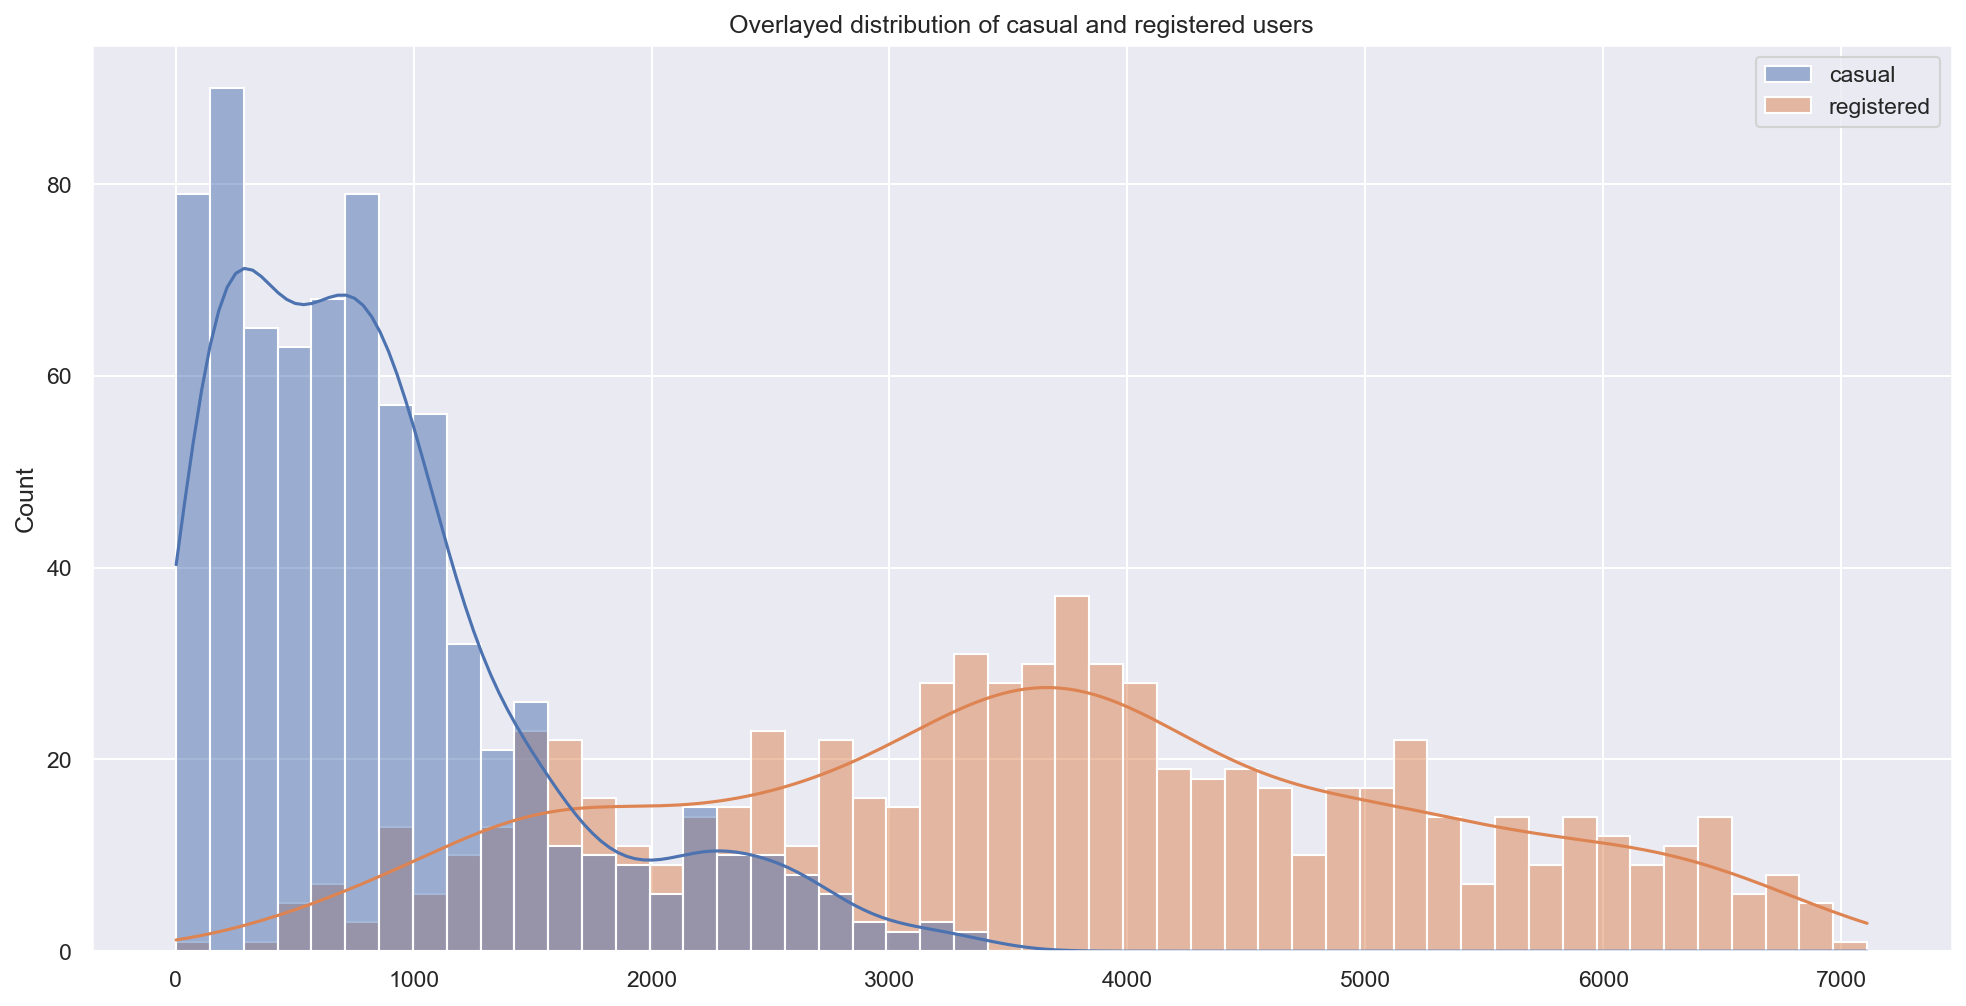

In [439]:
#code for 2a goes here
sns.histplot(data = daily_counts, color = 'red', alpha = 0.5, kde = True, bins = 50).set(title = 'Overlayed distribution of casual and registered users');

### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered users.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 

*** fancy answer goes here ***
The plot for the casual riders shows that on most days there are only between 0-1000 casual riders. On a few days there are even up to 3400 riders, but these days can be considered outliers. It is clearly skewed right with a tail to the right. It has no real symmetry. The distribution for the registered riders is more normalised. The mode is at the mean and it shows that on most days there is an average number of users of around 3900 registered user. It is very symmetric at an axis through the mode. There are some outliers - there are a few days with barely any users (20) and only a few with 7000 or more registered drivers. There is also a gap at around 100 riders per day - coincidentally that is the mode of the casual riders? There is a small plateau at around 2000 riders, that occurs more often than its symmetric counter part 5500. The two varibales also differ in spread. The casual rider data set is has a more narrow spread, whereas the registered riders have a broad distribution.

### Question 2c

In addition to the type of user (casual vs. registered) and the overall count of each, what other kinds of demographic data would be useful (e.g. identity, neighborhood, monetary expenses, etc.)? 

*** fancy answer goes here ***
Gender would be interesting as well as age and profession. With this one could find the stereotypical user at a certain time and adress marketing and offers accordingly.Furthermore the mentioned demographic data such as neighborhood and monetary expenses would be useful to determine how many scooters should be put at which location at the city at what time. Tracking typical routes are also important to find out whether scooters need to be moved artificially to areas of a higher demand or whether it is a functioning cycle. Monetary expenses would be important to figure out the correct pricing of rides - how much can the average user afford to pay for travel costs and should prices possibly vary throughout the day to account for higher usage. One other important aspect would be finding out whether they are tourists or live in rome to understand the target group better.



### Question 2d

What is an example of a privacy or consent issue that could occur when accessing the demographic data you brought up in the previous question?

<!--
BEGIN QUESTION
name: q2d
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

*** fancy answer goes here ***
Gender and age should be okay to give as these are too generic to place to certain people. When adding however profession and neighbourhood and travel routes it starts becoming an issue. The data needs to be scored encrypted and secure becasue otherwise possible data leaks can lead to a lot of information such as which person travels where every day or targetting people to commit crimes on. Furthermore people would presumably not want to give up their monetary expenses. Since a lot of apps and other things track routes, most people would probably consent to that, but still a consent form is necessary.  



### Question 2e

The density plots do not show us how the counts for registered and casual users vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `full` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line. Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small to help reduce overplotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. Make sure to include a title.

**Hints (updated):** 
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).

* You will need to set `x`, `y`, and `hue` and the `scatter_kws` in the `sns.lmplot` call.

* You will need to call [`plt.title`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html) to add a title for the graph.

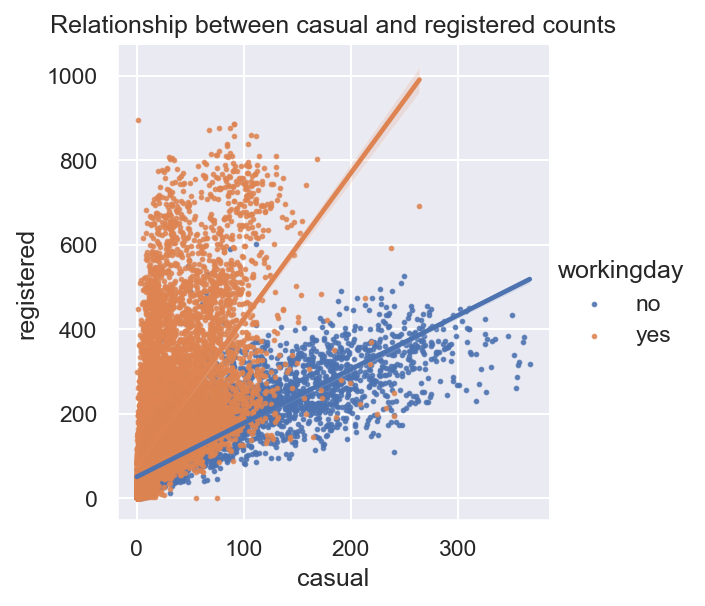

In [440]:
#code to 2e goes here
sns.lmplot(data=new, x = 'casual', y='registered', hue = 'workingday', fit_reg=True, height = 4, scatter_kws={"s": 3});
plt.title("Relationship between casual and registered counts");
# Depending on the setup, you might want to make the font size a bit bigger


### Question 2f

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered users and whether or not the day is a working day or not? What effect does [overplotting](https://www.displayr.com/what-is-overplotting/) have on your ability to describe this relationship?

*** fancy answer goes here ***
There are basically to visible trends. In general there seems to be a somewhat linear relationship between casual and registered users. The more registered user, the more casual users too. Overall however, there is alwyas about double the amount of registered users. However when there is only very little casual users there is a lot of registered users - more than when the casual riders rise.  There seems to be a clearer linear relationship for holidays: when there is hardly any casual users there is also - with the exceptions of a few outliers only about 100 registered users. 
Due to overplotting however, it is difficutl to see how many points there actually are in the highly populated areas of the graph. When reducing the size of the points, the pattern becomes somehwat clearer: the holiday points are very similar to the working day points, just shifted downwards a bit: that means there are less registered users for these dasy then on workingdays. 


## 3: Visualization

### Question 3

#### Question 3a Bivariate Kernel Density Plot
 
To address overplotting, we will try visualizing the data with another technique, the bivariate kernel density estimate.

You will want to read up on the documentation for `sns.kdeplot` which can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

You can think of this plot as an overhead countour or topographical map, where the "high" regions are those with more data points, and "low" regions are those with fewer data points.

A basic kde plot of all the data is quite easy to generate. However, this plot includes data from working and non-working days, which isn't what we want. Check the code below for how to generate a simple KDE plot. Adjust any variable names, if you have to.

<AxesSubplot:xlabel='casual', ylabel='registered'>

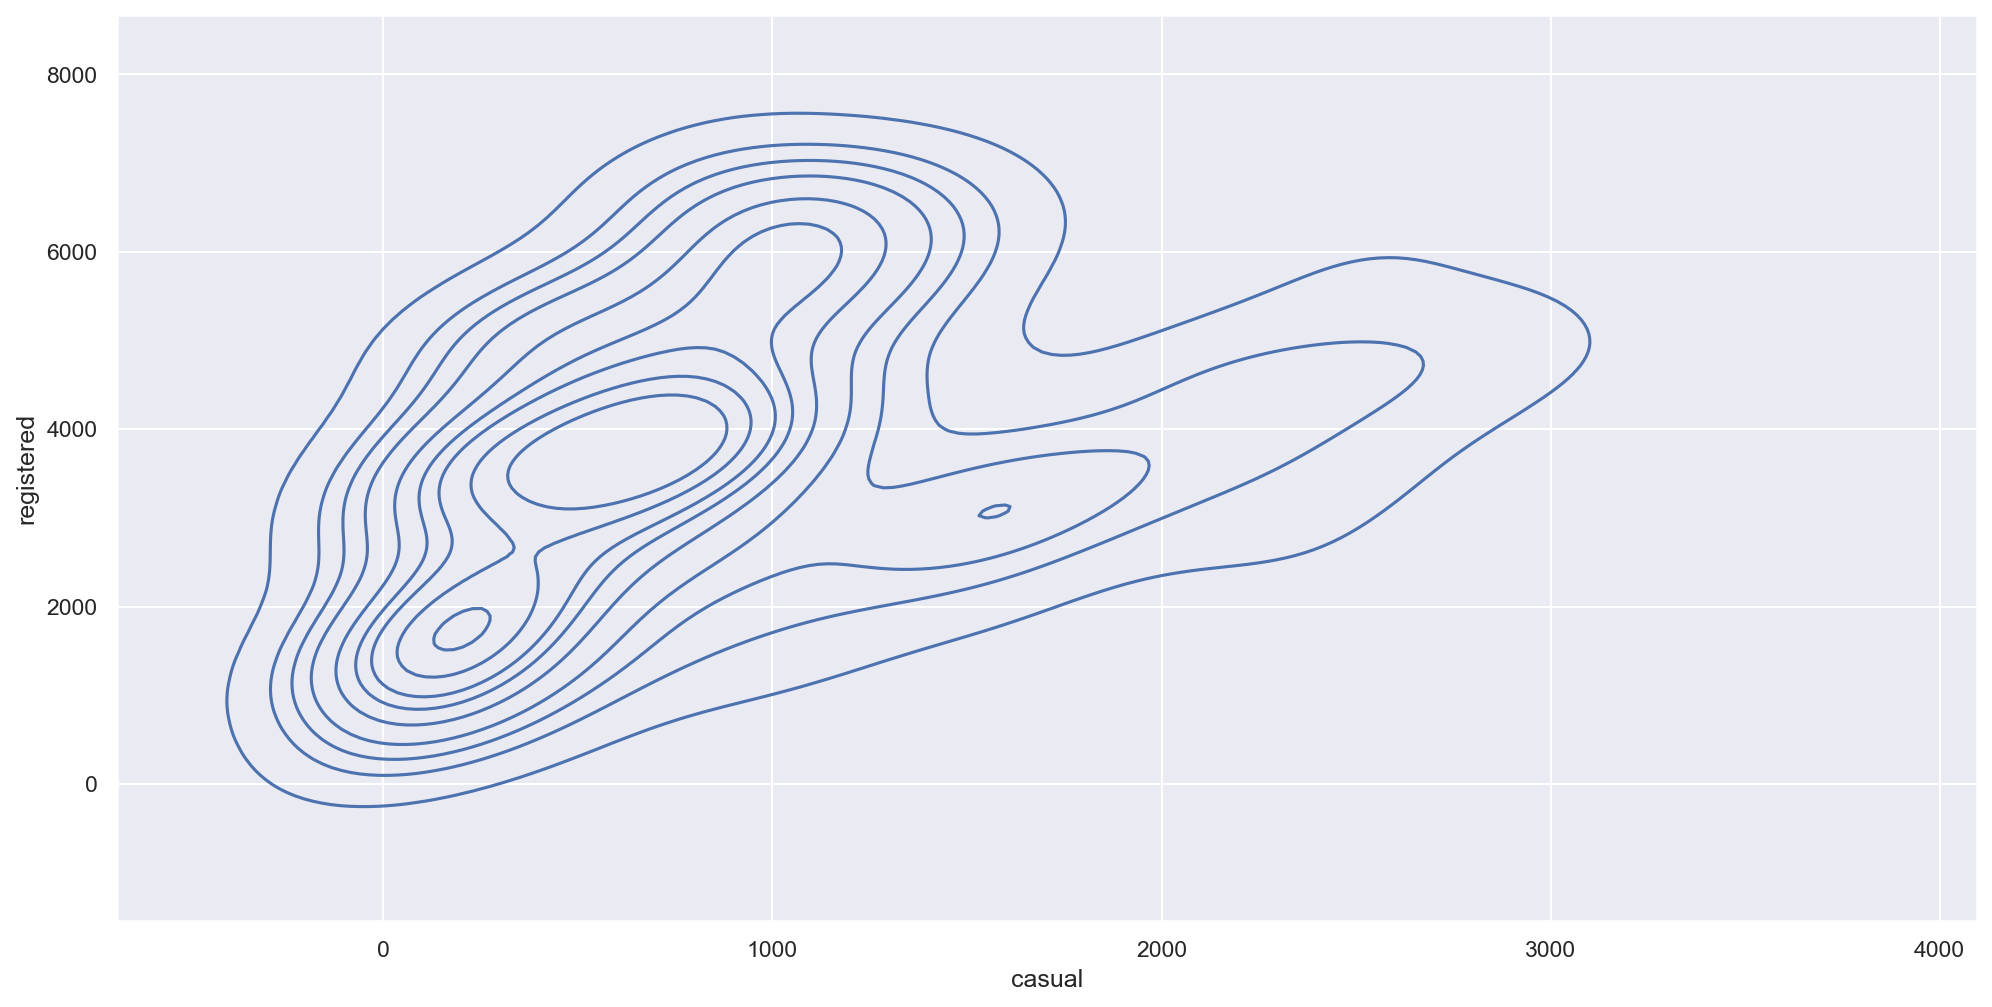

In [441]:
sns.kdeplot(data=daily_counts, x='casual', y='registered')
#deprecated (old) (update 13/2)
#sns.kdeplot(daily_counts['casual'], daily_counts['registered'])
#plt.title('KDE Plot Comparison of Registered vs Casual Users');

Generating the plot with working and non-working days separated can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish however if you do not want to follow the walkthrough.

**Hints (updated):** 
* You can use `loc` with a boolean array and column names at the same time
* You will need to call kdeplot twice, each time drawing different data from the `daily_counts` table.
* Check out this [guide](https://matplotlib.org/stable/tutorials/introductory/usage.html) to see an example of how to create a legend. In particular, look at how the example in the guide makes use of the `label` argument in the call to `plt.plot()` and what the `plt.legend()` call does. This is a good exercise to learn how to use examples to get the look you want.
* You will want to set the `cmap` parameter of `kdeplot` to `"Reds"` and `"Blues"` (or whatever two contrasting colors you'd like), and also set the `label` parameter to address which type of day you want to plot. You are required for this question to use two sets of contrasting colors for your plots.

After you get your plot working, experiment by setting `shade=True` in `kdeplot` to see the difference between the shaded and unshaded version. Please submit your work with `shade=False`. 

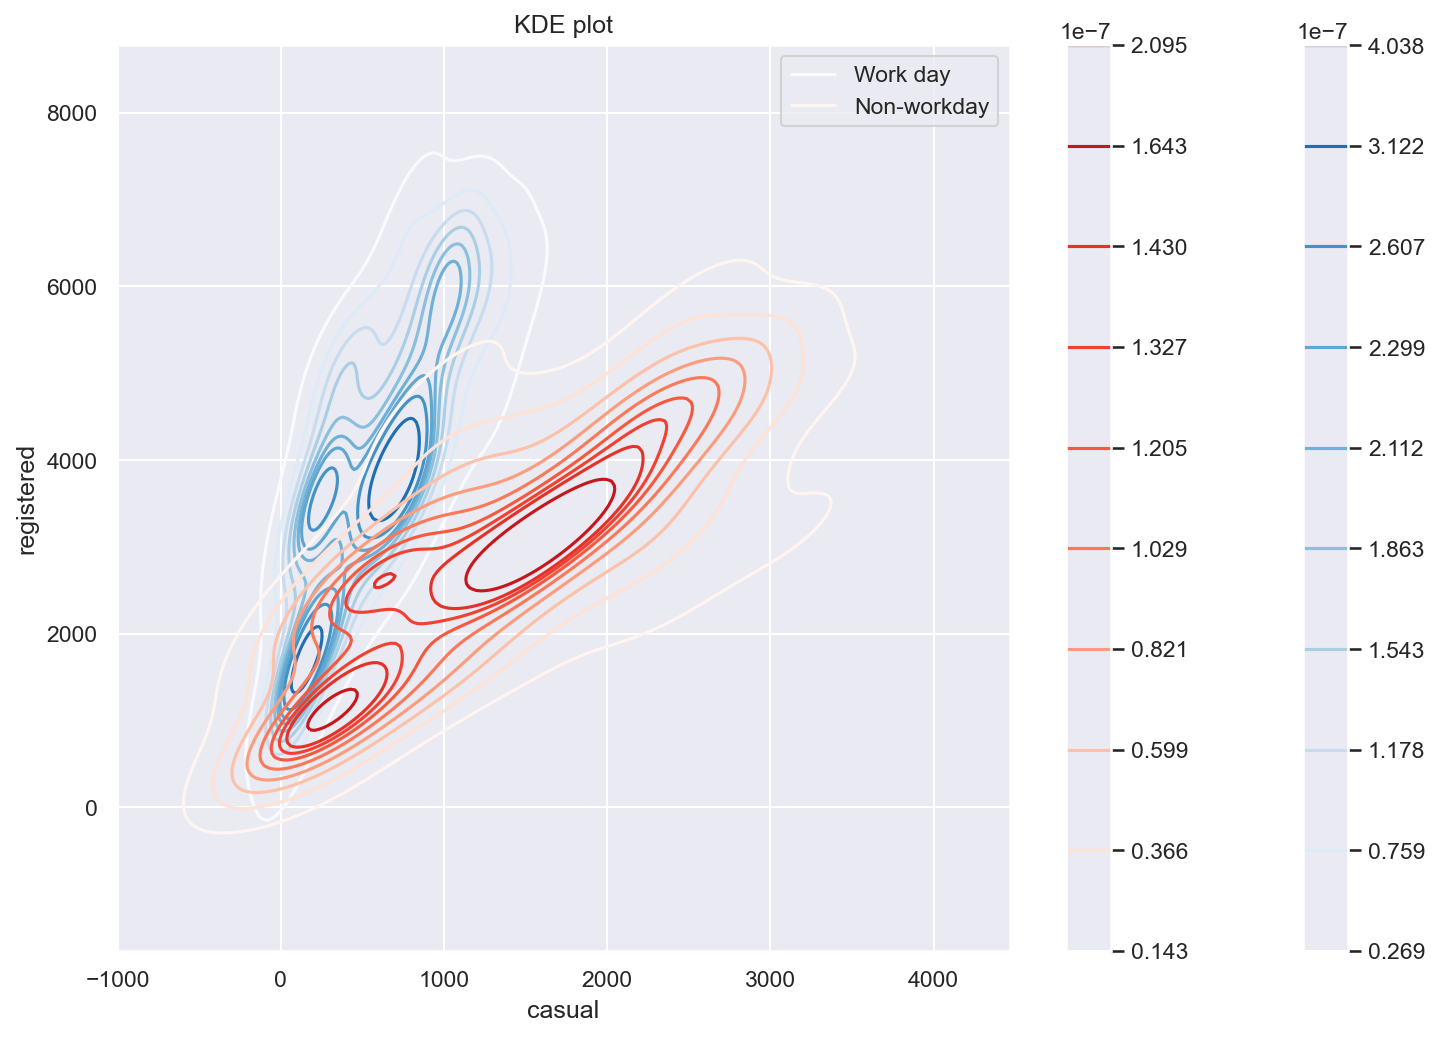

In [442]:
#code to 3a goes here

# Set the figure size for the plot
plt.figure(figsize=(12,8))

# Set 'is_workingday' to a boolean array that is true for all working_days
is_workingday = daily_counts[daily_counts['workingday'] == 'yes']

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on workdays
# Hint: consider using the .loc method here.
casual_workday = is_workingday['casual']
registered_workday = is_workingday['registered']

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides
sns.kdeplot(x = casual_workday, y=registered_workday, cmap = 'Blues', shade = False, cbar = True, label = 'Work day')

not_workingday = daily_counts[daily_counts['workingday'] == 'no']
# Repeat the same steps above but for rows corresponding to non-workingdays
# Hint: Again, consider using the .loc method here.
casual_non_workday = not_workingday['casual']
registered_non_workday = not_workingday['registered']

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for non-workingday rides

sns.kdeplot(x = casual_non_workday, y = registered_non_workday, cmap= 'Reds', shade = False, cbar = True, label = 'Non-workday')
plt.title("KDE plot")
plt.plot()
plt.legend()

#### Question 3b

What additional details can you identify from this contour plot that were difficult to determine from the scatter plot?

*** fancy answer goes here ***
It is visible that the non-work-days have a larger spread and less clear linear relationship between registered and casual users. There are by far more people casually using the rides on non-work-days.


## 4: Joint Plot

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual users plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (working day vs. non-working day).

**Hints (updated)**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.

**Note**:
* At the end of the cell, we called `plt.suptitle` to set a custom location for the title.
* We also can call `plt.subplots_adjust(top=0.9)` in case your title overlaps with your plot.

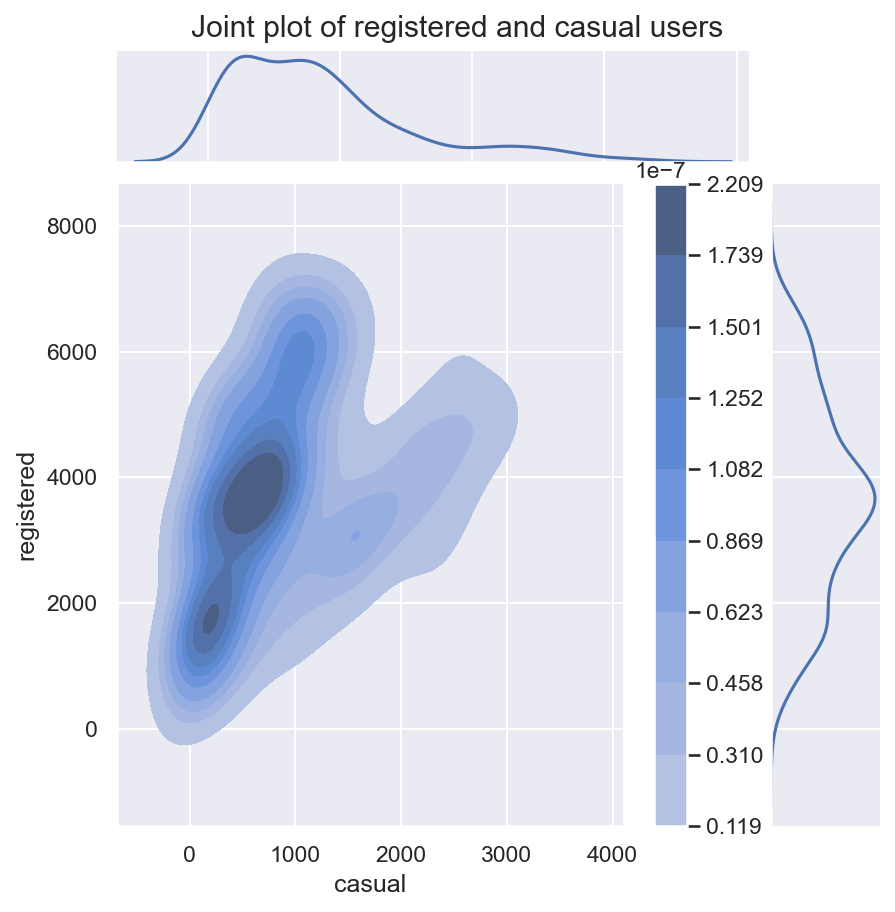

In [443]:
#code for 4 goes here
sns.jointplot(data= daily_counts, x = 'casual', y = 'registered', kind = 'kde', shade = True, cbar = True)
plt.suptitle('Joint plot of registered and casual users', y = 1.01);

---
## 5: Understanding Daily Patterns

### Question 5

#### Question 5a
Let's examine the behavior of users by plotting the average number of users for each hour of the day over the **entire dataset**, stratified by user type. Here, two line plots in the same figure should be okay (pay attention to proper labeling).


/var/folders/hr/06_4c5ms5t14mwgxs9n9bl100000gn/T/ipykernel_18176/3634994442.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  casual_avg = full.groupby('hr')['casual', 'registered'].mean()


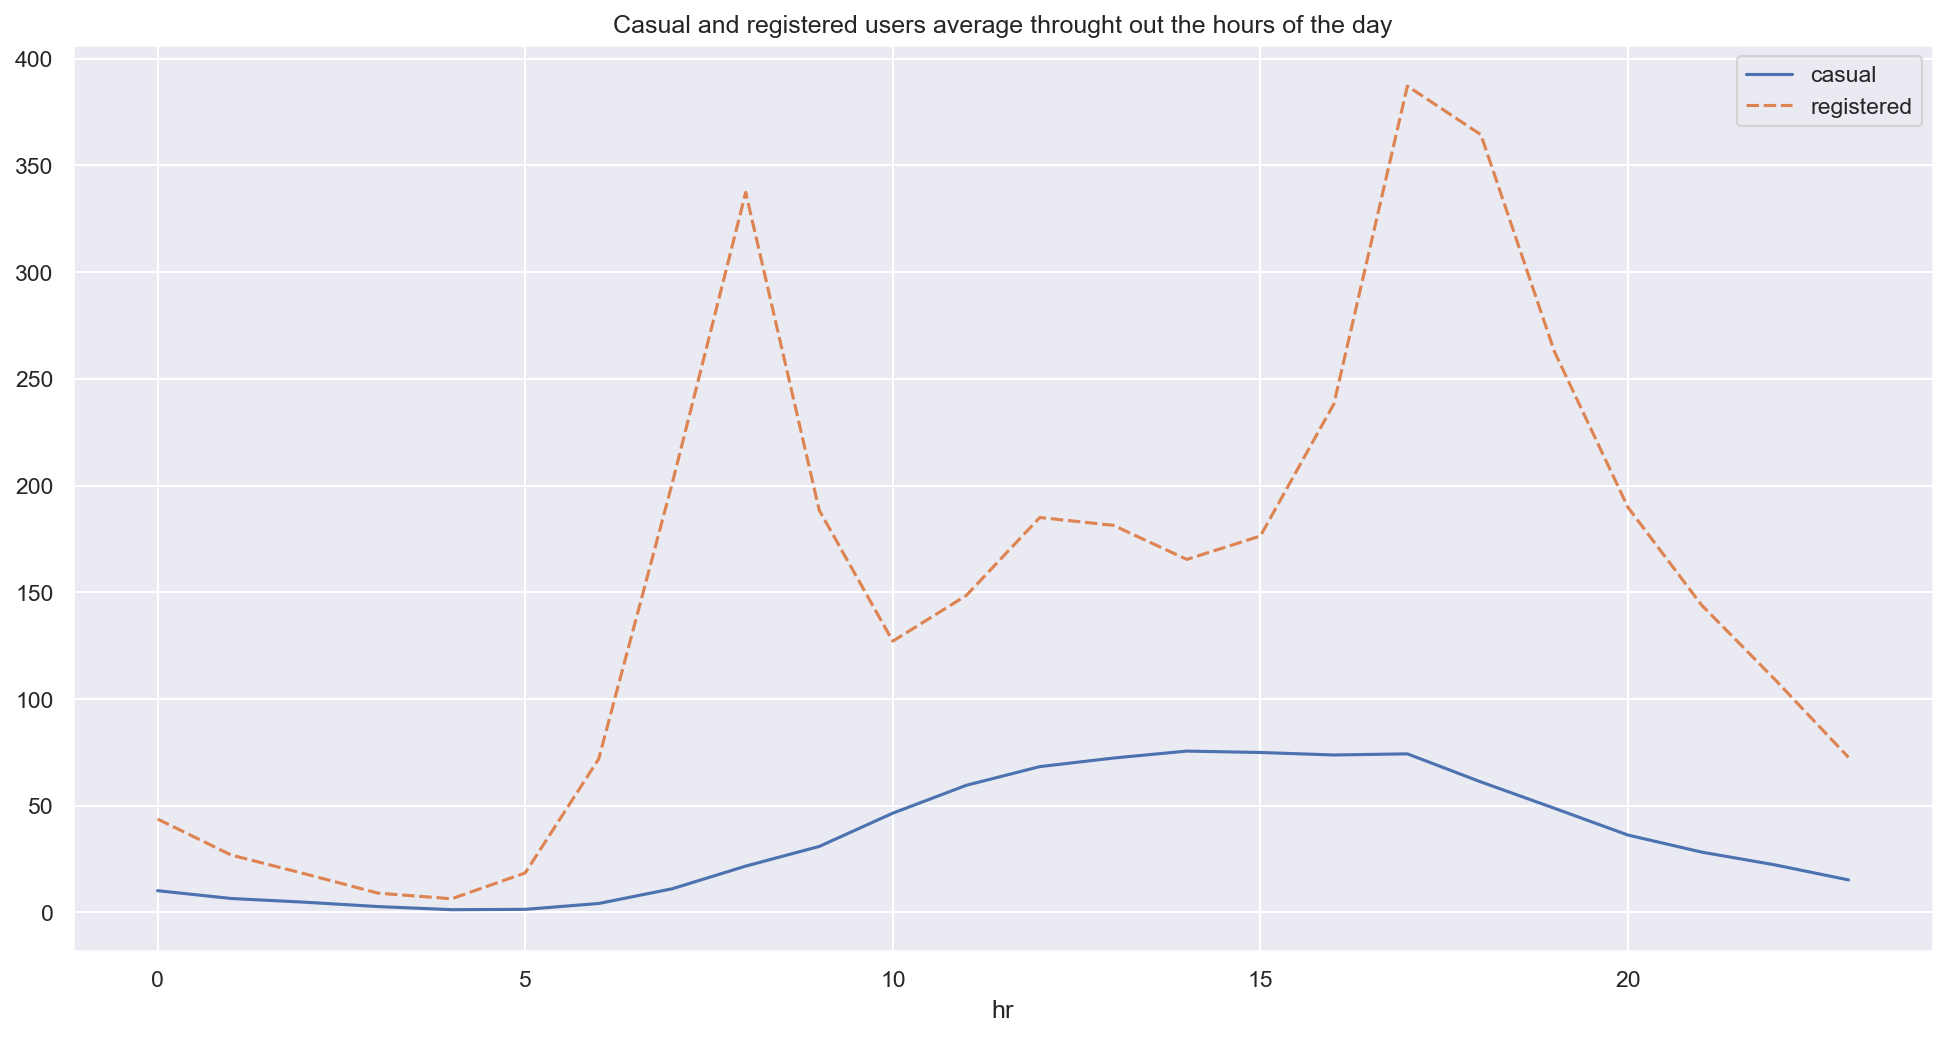

In [444]:
#answer to 5a goes here
casual_avg = full.groupby('hr')['casual', 'registered'].mean()
sns.lineplot(data = casual_avg[['casual', 'registered']]);
plt.title("Casual and registered users average throught out the hours of the day");

#### Question 5b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered users' distribution.

*** fancy answer goes here ***
One can observe from this plot that there are two peaks in the registered users' distribution: one at around 8 and one around 6 which corresponds to regular working hours. This could mean that most registered users utilize the rides to get to and from work and since this is a regular thing they do nearly everyday, it makes sens that they are registered users. The casual users seem to use the rides throughout the day - which in turn could mean that casual users might not have teh conventional 9-5 job, are still in education or are simply tourists that explore the city during the day.


---
## 6: Exploring Users and Weather

Now let's examine how the weather is affecting user' behavior. First let's look at how the proportion of casual user changes as weather changes.

### Question 6

#### Question 6a
Create a new column `prop_casual` in the `full` DataFrame representing the proportion of casual users out of all users.

In [445]:
#answer to 6a goes here
prop__casual = []
for i in range(17379):
        p = full.iloc[i,14 ]/full.iloc[i, 16]
        prop__casual.append(p)
full["prop_casual"] = prop__casual
full.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1,0.000000


#### Question 6b
In order to examine the relationship between proportion of casual users and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below (or adapt it if you have renamed any variables) and then comment on its explainability.

**Hint**: You will need to set the `data`, `x`, `y`, and `hue` in the `sns.scatterplot` call.

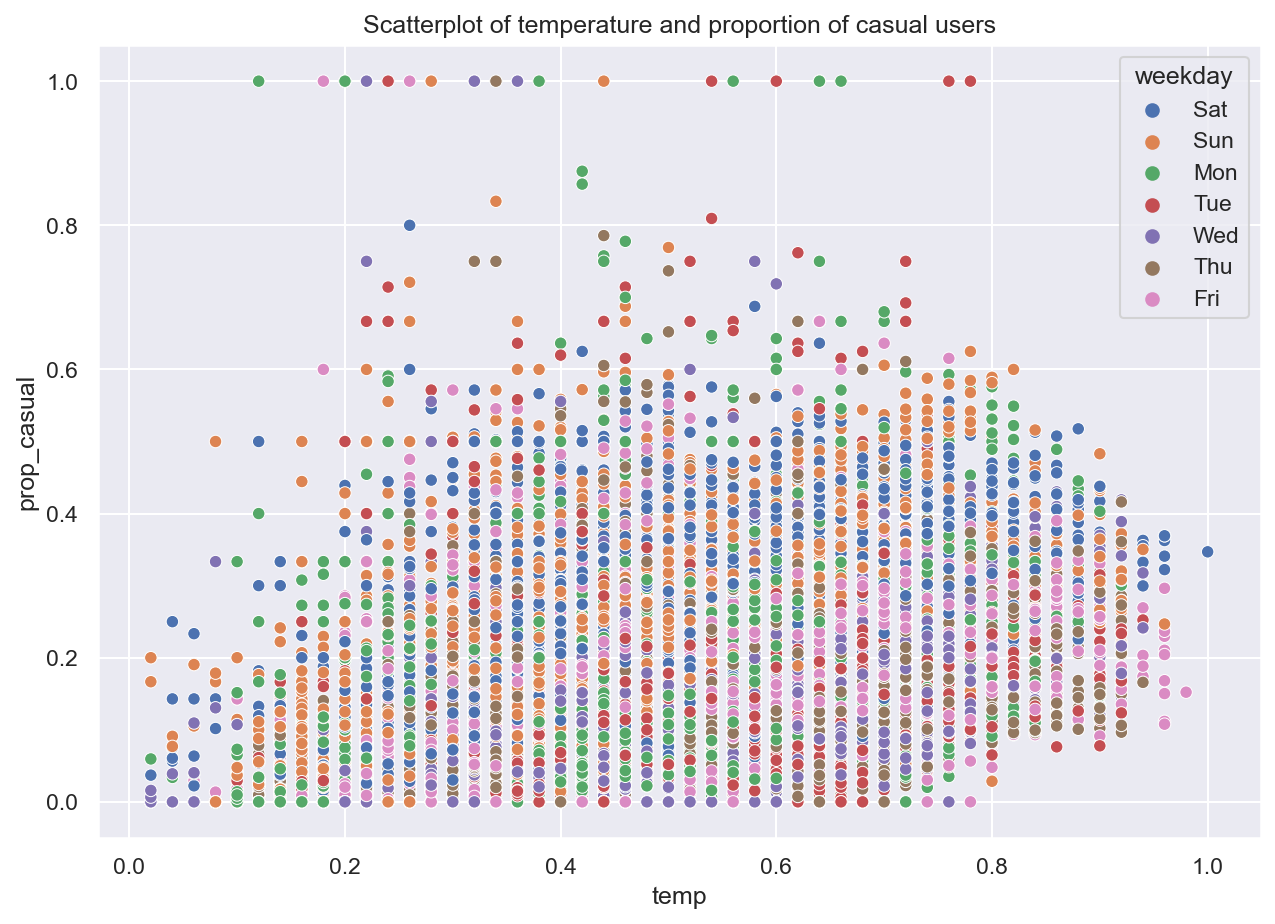

In [446]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=full, x="temp", y="prop_casual", hue="weekday");
plt.title("Scatterplot of temperature and proportion of casual users");

How would you comment on this figure? Mention any problems you see. How would you think of approaching this problem?

*** fancy answer goes here ***
One big problem is definitely that there is a huge density of points which makes clear readability difficult - the points are also not transparent and too big which makes it very convoluted. This also makes it impoosibel to recognise how much correlation there really is between temperature and the proporton of casual users. Another problem is that the colours used for the weekdays are very similar, which makes it more difficult to recognize trends - such as if it is a sunday and above this temperature, the proportion of causal users rises. In general, this scatterplot is difficult to read and to extract information from.  
Grouping the data together to decrease the number of points would be the first step. Making the points half transparent is a next step. Changing the color setting on hue is also good, so the different days get easier to discern. Using jitter would also be good.  Finally, adding a best fit lineplot to show the groupings per day, would be useful. With these changes the scatterplot could be much improved. 


A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The green curve shown is a smoothed version of the scatterplot.

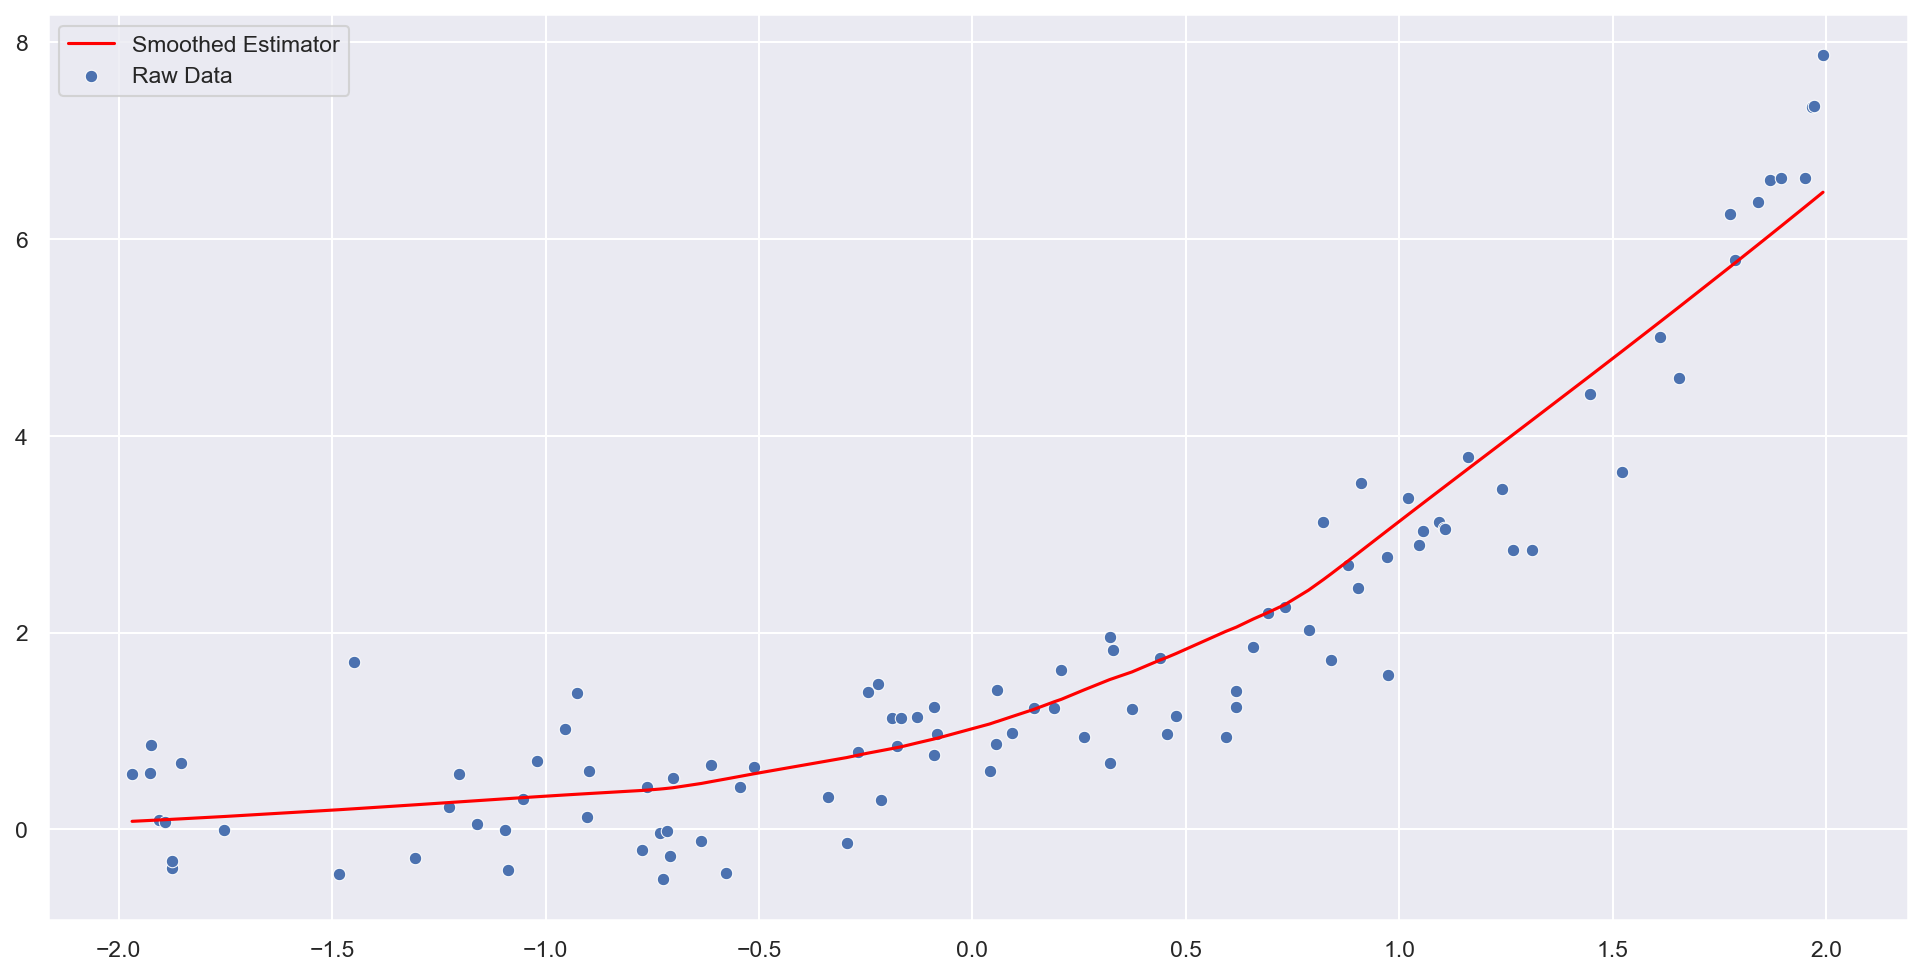

In [447]:
#updated 13/2
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(x=xobs, y=yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(x=xobs, y=ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

In our case with the users' data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual users.

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* The `lowess` function expects y coordinate first, then x coordinate. You should also set the `return_sorted` field to `False`.

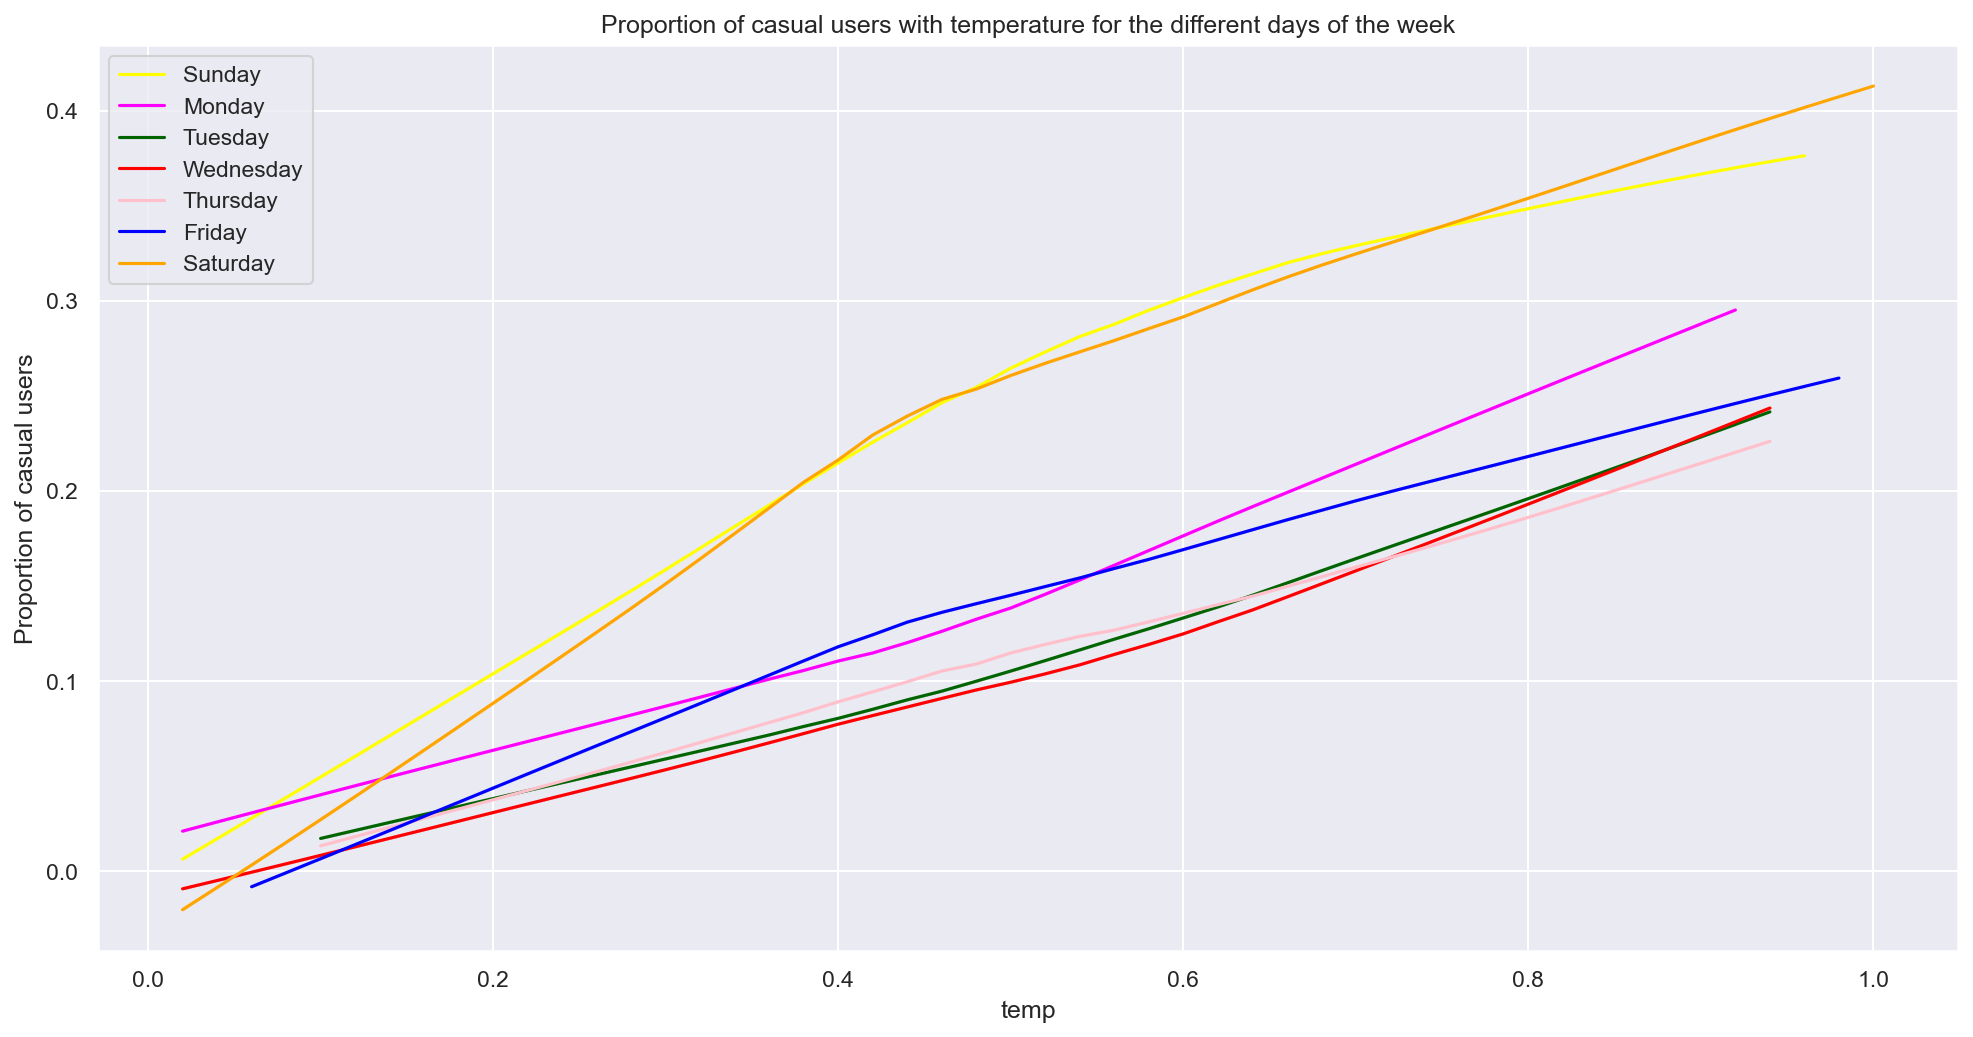

In [448]:
#your code for 6b
from statsmodels.nonparametric.smoothers_lowess import lowess
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
colors = ['yellow', 'magenta', 'darkgreen', 'red', 'pink', 'blue', 'orange']
days = ['Sun', 'Mon', 'Tue','Wed', 'Thu', 'Fri', 'Sat']
for i in range(7):  #loop to create the 7 plots
    mask= full['weekday']== days[i] 
    day = full.loc[mask] #slicing dataframe into a datafram of a specific weekday
    x_d = day['temp']
    y_d = day['prop_casual']
    ysmooth = lowess(y_d, x_d, return_sorted=False)
    sns.lineplot(x=x_d, y=ysmooth, label=days_of_week[i], color=colors[i])
plt.legend();
plt.title("Proportion of casual users with temperature for the different days of the week");
plt.ylabel("Proportion of casual users");


### Question 6c

What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?

*** fancy answer goes here ***
This curve plot show that there is a difference between weekend and weekday behaviour of casual users. While the proportion of casual users rises in general with the temperature, it does more so during the weekend. The curves for saturday and sunday are basically overlapping fully and so do the lines for tuesday, wednesday and thursday. On these 3 midweek days there is a very linear relationship between temperature and casual users. On monday and friday the proportion of casual users rises more with the temperature rising compared to tues/wed/fri. It rises the most on the weekend however. Unlike the other 5 plots, these two also display a clear change in slope: while the slope is quite steep until a temp of ca 0.45, it gets less steep and is more at the angle of the other 5 sloped after that point. This means, during the weekend more people will be tempted to casually use rides and explore rome even though it is not quite that warm. Once it hits a certian temperature, the change in rise in temeprature and proportion of casual riders is similar to that during the week. 

### Question 6d

Based on the data you have explored (distribution of users, daily patterns, weather, additional data/information you have seen), do you think this scooter user info should be realistically scaled across other cities in Italy. Why or why not? Justify your answer as a data scientist.

*** fancy answer goes here ***
I think when scaling this infor for other cities across italy, certain things need to be considered. The weather aspects might be the first one: italy is a very long country, meaning the temperature differs throughout italy significantly. This different temeprature might very well have effects on user behaviour - who knows if people in Sicily and in the Dolomites really act the same as people in rome at the same time of the year/seasons etc. Furthermore, rome is a very busy city. This means, people using their own cars to travel to and from work are rarer than in other cities - this means rome presumably has a higher number of registered users than can be expected from other cities. It is on top of that very touristic, which means tourists probably constitute a high number of the casual users given their behaviour (mostly used during the day, the weekend and with good weather). In cities with less cultural/onterntional meaning thant rome, this could very well not be the case. 
From a data scientists perspective it definitley should not be. The data does not suffice to be scaled across multiple cities. For that to be the case, this study would have had to have been conducted in multiple cities to get more general data - not city specific as it is now. 


### Question 7a. Compute Something Interesting

Play with the data and try to compute something interesting about the data. Please try to use at least one of groupby, pivot, or merge (or all of the above).  

Please show your work in the cell below and describe in words what you found in the same cell. This question will be graded leniently but good solutions may be used to create future clinics.

#### Grading ####

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): Uses a combination of pandas operations (such as groupby, pivot, merge) to answer a relevant question about the data. The text description provides a reasonable interpretation of the result.
- **Passing** (1-3 points): Computation is flawed or very simple. The text description is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No computation is performed, or a computation with completely wrong results.


***Put your code in one cell below and your explanation in a markdown cell below***

In [449]:
#your code for 7a
#average casual users and average number of users dependant on weather
weather = full.groupby('season')[['prop_casual', 'cnt', 'temp']].mean()
weather

,prop_casual,cnt,temp
season,,,
1,0.115707,111.114569,0.299147
2,0.210175,208.344069,0.544663
3,0.215191,235.975979,0.706410
4,0.143630,198.868856,0.423138


*** explanation goes here ***
As visible from the table and the two plots, there is a correlation between season and the proportion of casual users. In summer and spring the average proportion of casual users nearly doubled compared to winter. In general more users used the rides during spring and summer than during winter an autumn. This makes sense, as motorbikes are uncomfortable or dangerous in bad weather. The change in casual users also makes sense in the context of the hypothesis that casual users might often be tourists. Since Rome is more popular for tourists in summer and spring, the increase in the average proportion of casual users is logical. This again displays the earlier shown connection between temperature and casual users/users in general.

### Question 7b. Create some more cool visualizations!

Play with the data, and try to produce some visualizations to answer one question that you find interesting regarding the data. You might want to use `merge`/`groupby`/`pivot` to process the data before creating visualizations.

Please show your work in the cells below (feel free to use extra cells if you want), and describe in words what you found. This question will be graded leniently, but good solutions may be used to create future clinic problems. 


#### Grading ####

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): The chart is well designed, and the data computation is correct. The text written articulates a reasonable metric and correctly describes the relevant insight and answer to the question you are interested in.
- **Passing** (1-3 points): A chart is produced but with some flaws such as bad encoding. The text written is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No chart is created, or a chart with completely wrong results.

You should have the following in your answers:
* a few visualizations; Please limit your visualizations to 5 plots.
* a few sentences (not too long please!)

***Put your code in one cell below and your explanation in a markdown cell below***

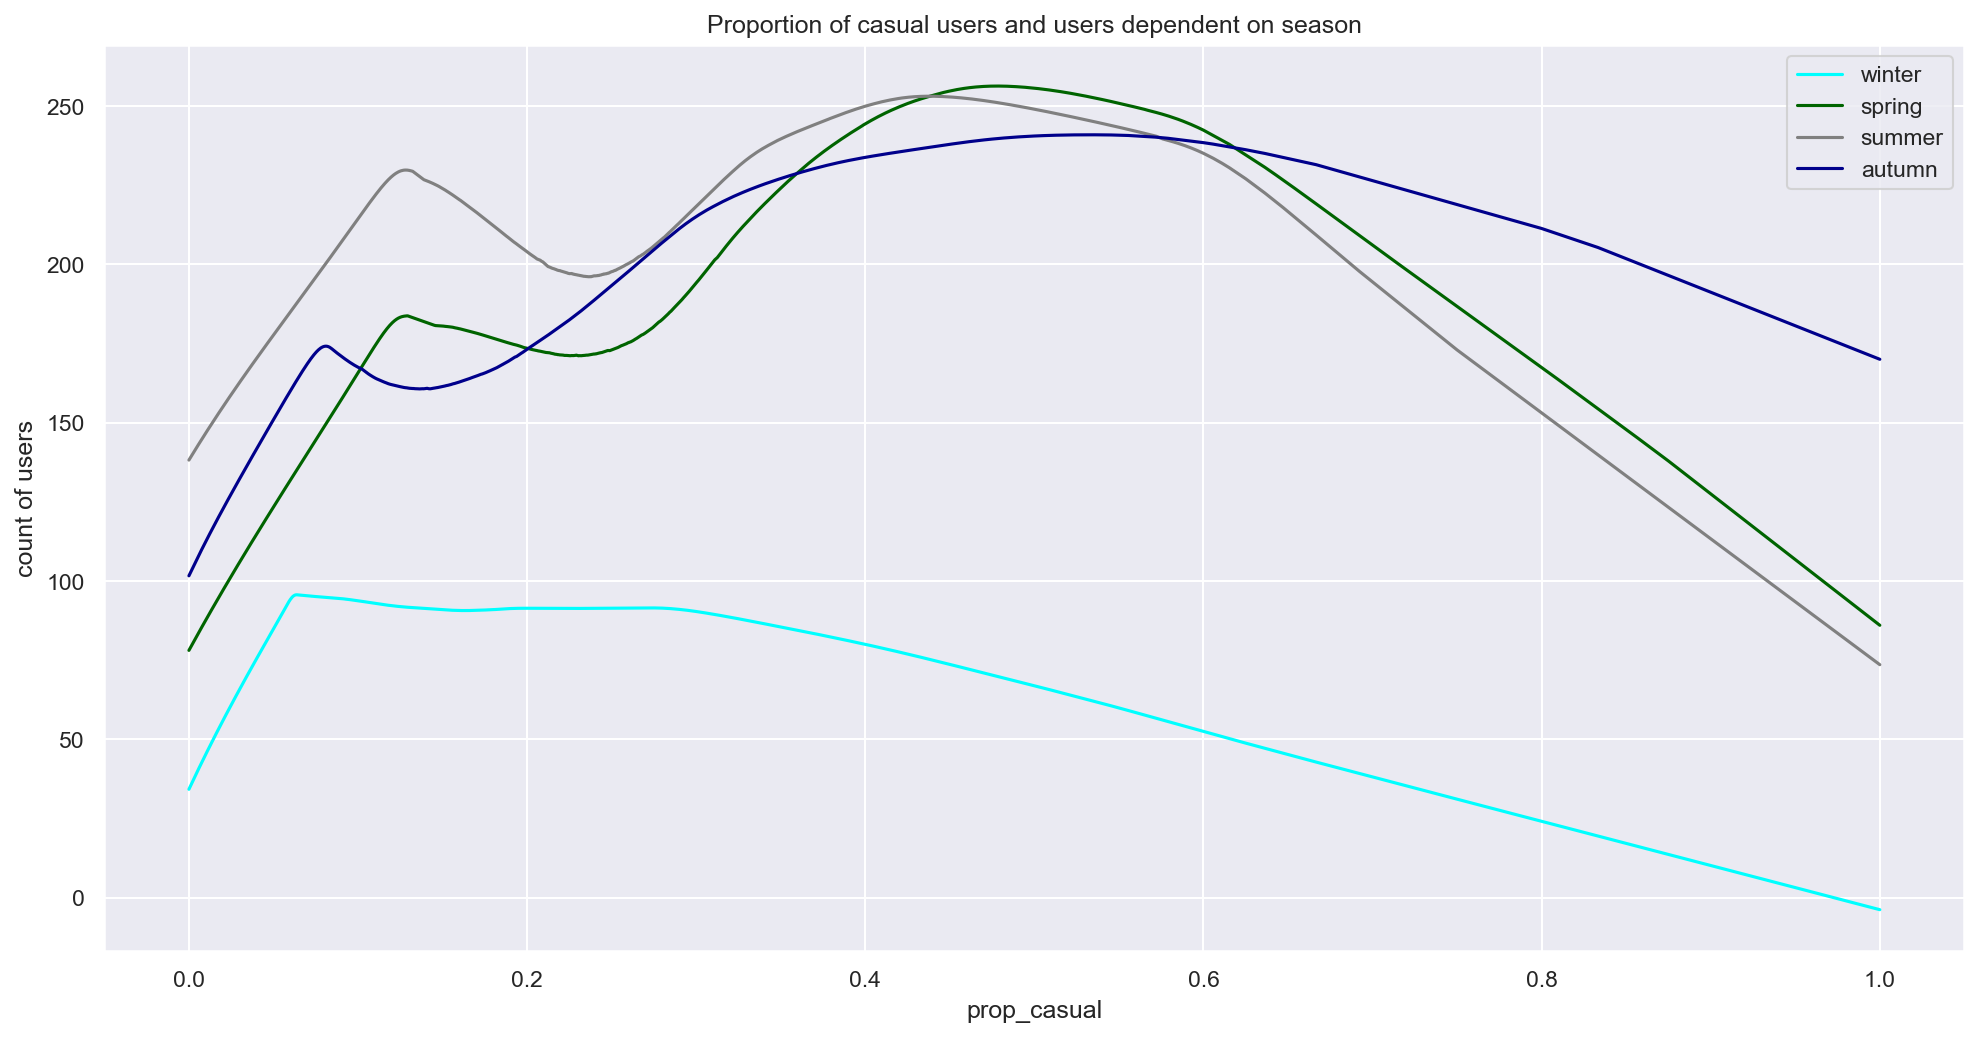

In [450]:
#your code for 7b
weathersit = ['winter','spring', 'summer', 'autumn']
colors = ['cyan', 'darkgreen', 'grey', 'darkblue']
for i in range(4):
    mask= full['season']== i+1
    day = full.loc[mask]
    x_d = day['prop_casual']
    y_d = day['cnt']
    ysmooth = lowess(y_d, x_d, return_sorted=False)
    sns.lineplot(x=x_d, y=ysmooth, label=weathersit[i], color=colors[i])
plt.legend();
plt.title('Proportion of casual users and users dependent on season');
plt.ylabel("count of users");

*** explanation goes here ***
This plot shows the relationship between the proportion of casual users, the total number of users and the different seasons. As clearly visible, there are significantly less users of rides during winter. The curves for spring and summer are very similarly, with the spring in general being lower than the summer - this means similar. behaviour and smae proportion of casual users but there's just more overall users in summer than spring. Autumn is lower than summer and spring but still very similar to those two - again similar behaviour but not as many people as in summer. 


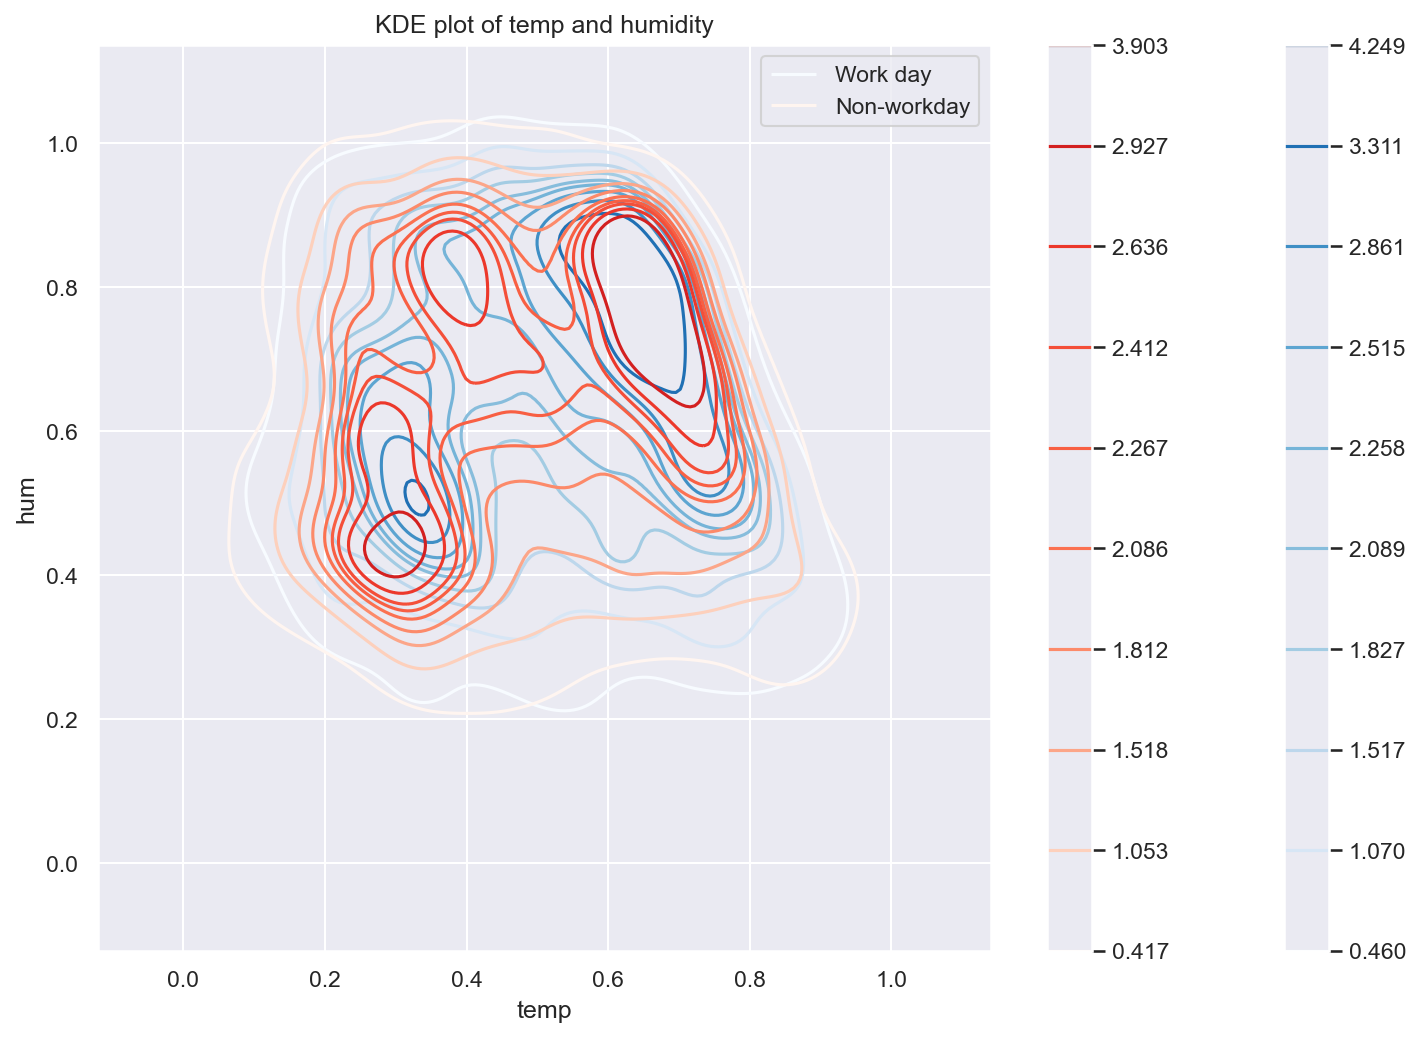

In [451]:
#temperature and humidity depending on weekend and weekday
plt.figure(figsize=(12,8))
is_workingday = new[new['workingday'] == 'yes']
sns.kdeplot(x = is_workingday['temp'], y=is_workingday['hum'], cmap = 'Blues', shade = False, cbar = True, label = 'Work day')
not_workingday = new[new['workingday'] == 'no']
sns.kdeplot(x = not_workingday['temp'], y = not_workingday['hum'], cmap= 'Reds', shade = False, cbar = True, label = 'Non-workday')
plt.title("KDE plot of temp and humidity")
plt.plot()
plt.legend()

***Temperature and humidity plot, data separated in weekday and weekend***
As visible from this plot, the two data sets are pretty much overlayed which was to be expected. There is no real difference between temperature and humidity dependant on whether the day is weekend/weekday This plot does however show that certain pairings of humidity and temperature are more common than others: temp=0.7, hum = 0.6-0.8. 

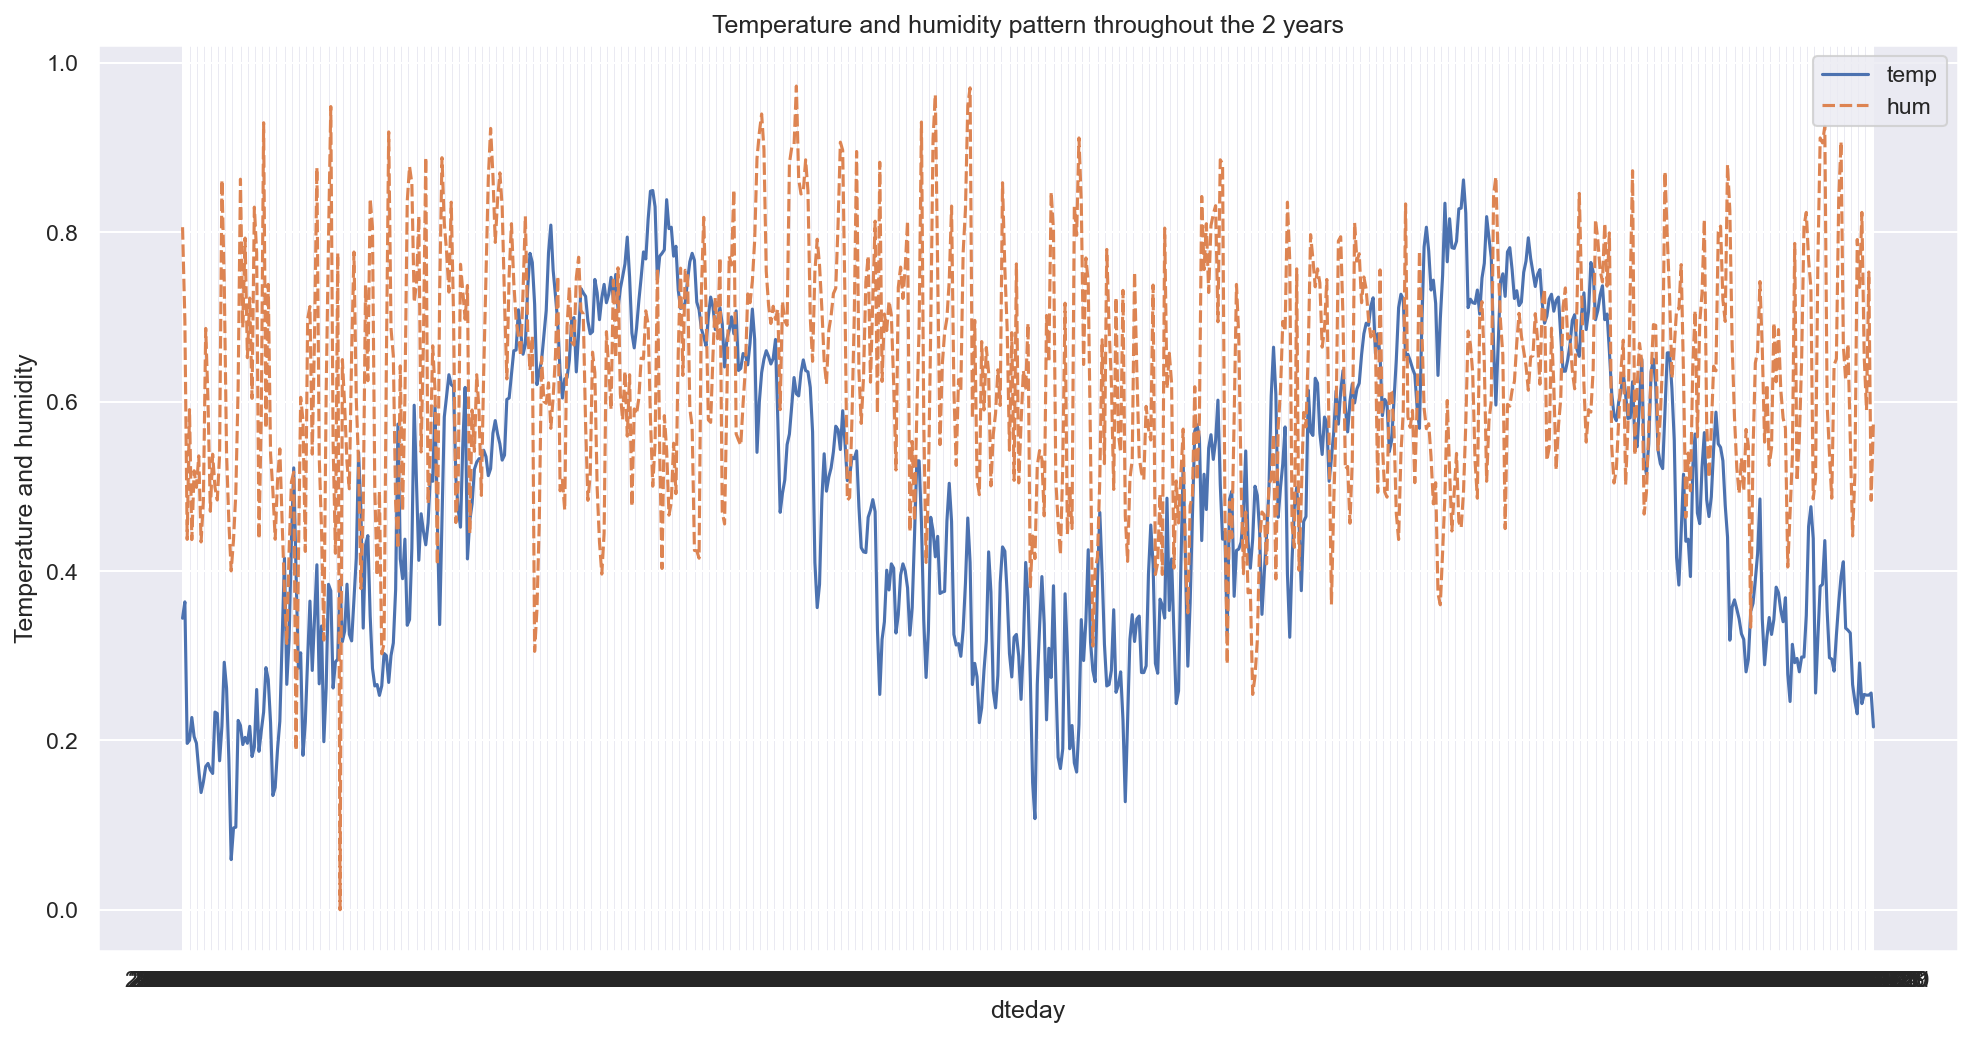

In [452]:
weather_info = full.groupby('dteday')[['temp', 'hum']].mean()
sns.lineplot(data =weather_info[['temp', 'hum']])
plt.title("Temperature and humidity pattern throughout the 2 years");
plt.ylabel('Temperature and humidity');

***Temperature and humidity patter throughout the 2 years***
This plot shows the cyclic behaviour of the temperature  - the sinusoidal form of the plot shows that the temperature is periodic with a period of 1 year. The humidity plot has a less clear line, it varies a lot more. 